In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

In [47]:
data = pd.read_csv('AirPassengers.csv')

In [48]:
data = data['#Passengers']

In [49]:
data = np.array(data)
data

array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
       405, 355, 306, 271, 306, 315, 301, 356, 348, 355, 422, 465, 467,
       404, 347, 305, 336, 340, 318, 362, 348, 363, 435, 491, 505, 404,
       359, 310, 337, 360, 342, 406, 396, 420, 472, 548, 559, 463, 407,
       362, 405, 417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390,
       432], dtype=int64)

In [50]:
data = data.reshape(-1,1)

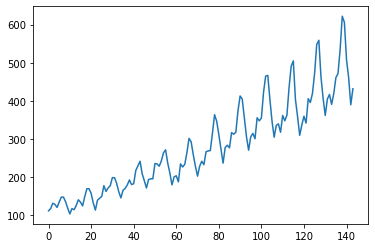

In [51]:
plt.plot(data)

In [52]:
scalar = MinMaxScaler()
data = scalar.fit_transform(data)

In [53]:
data.shape

(144, 1)

In [54]:
train_size = 100
test_size = 44

In [55]:
train = data[:train_size,:]
test = data[train_size:len(data),:]

In [56]:
print(train.shape)
print(test.shape)

(100, 1)
(44, 1)


In [57]:
timeStep = 5
dataX = []
dataY = []
for i in range(timeStep,len(train) - 5 - 1):
    dataX.append(train[i-timeStep:i,0])
    dataY.append(train[i,0])
    
dataX, dataY = np.array(dataX), np.array(dataY)

In [58]:
dataX.shape

(89, 5)

In [59]:
dataY.shape

(89,)

In [60]:
dataX

array([[0.01544402, 0.02702703, 0.05405405, 0.04826255, 0.03281853],
       [0.02702703, 0.05405405, 0.04826255, 0.03281853, 0.05984556],
       [0.05405405, 0.04826255, 0.03281853, 0.05984556, 0.08494208],
       [0.04826255, 0.03281853, 0.05984556, 0.08494208, 0.08494208],
       [0.03281853, 0.05984556, 0.08494208, 0.08494208, 0.06177606],
       [0.05984556, 0.08494208, 0.08494208, 0.06177606, 0.02895753],
       [0.08494208, 0.08494208, 0.06177606, 0.02895753, 0.        ],
       [0.08494208, 0.06177606, 0.02895753, 0.        , 0.02702703],
       [0.06177606, 0.02895753, 0.        , 0.02702703, 0.02123552],
       [0.02895753, 0.        , 0.02702703, 0.02123552, 0.04247104],
       [0.        , 0.02702703, 0.02123552, 0.04247104, 0.07142857],
       [0.02702703, 0.02123552, 0.04247104, 0.07142857, 0.05984556],
       [0.02123552, 0.04247104, 0.07142857, 0.05984556, 0.04054054],
       [0.04247104, 0.07142857, 0.05984556, 0.04054054, 0.08687259],
       [0.07142857, 0.05984556, 0.

In [61]:
dataY

array([0.05984556, 0.08494208, 0.08494208, 0.06177606, 0.02895753,
       0.        , 0.02702703, 0.02123552, 0.04247104, 0.07142857,
       0.05984556, 0.04054054, 0.08687259, 0.12741313, 0.12741313,
       0.1042471 , 0.05598456, 0.01930502, 0.06949807, 0.07915058,
       0.08880309, 0.14285714, 0.11389961, 0.13127413, 0.14285714,
       0.18339768, 0.18339768, 0.15444015, 0.11196911, 0.08108108,
       0.11969112, 0.12934363, 0.14671815, 0.17181467, 0.14864865,
       0.15250965, 0.22007722, 0.24324324, 0.26640927, 0.2027027 ,
       0.16795367, 0.13127413, 0.17374517, 0.17760618, 0.17760618,
       0.25482625, 0.25289575, 0.24131274, 0.26833977, 0.30888031,
       0.32432432, 0.25675676, 0.20656371, 0.14671815, 0.18725869,
       0.19305019, 0.16216216, 0.25289575, 0.23745174, 0.25096525,
       0.30888031, 0.38223938, 0.36486486, 0.2992278 , 0.24131274,
       0.19111969, 0.24131274, 0.26640927, 0.24903475, 0.31467181,
       0.31853282, 0.32046332, 0.40733591, 0.5019305 , 0.46911

In [62]:
dataX = np.reshape(dataX,(dataX.shape[0],dataX.shape[1],1))
dataY = np.reshape(dataY,(dataY.shape[0],1))

In [63]:
dataX.shape

(89, 5, 1)

In [64]:
dataY.shape

(89, 1)

In [65]:
Xtrain = dataX
Ytrain = dataY

In [66]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(Xtrain.shape[1],Xtrain.shape[2])))
model.add(Dropout(0.2))
          
model.add(LSTM(100,return_sequences=True))
model.add(Dropout(0.4))
          
model.add(LSTM(150))
model.add(Dropout(0.5))
          
model.add(Dense(1))
model.compile(loss='mse',optimizer='adam')
model.fit(Xtrain,Ytrain,epochs=100,batch_size=32)

Epoch 1/100
3/3 [==============================] - 13s 33ms/step - loss: 0.0583
Epoch 2/100
3/3 [==============================] - 0s 25ms/step - loss: 0.0353
Epoch 3/100
3/3 [==============================] - 0s 22ms/step - loss: 0.0153
Epoch 4/100
3/3 [==============================] - 0s 22ms/step - loss: 0.0180
Epoch 5/100
3/3 [==============================] - 0s 23ms/step - loss: 0.0151
Epoch 6/100
3/3 [==============================] - 0s 27ms/step - loss: 0.0120
Epoch 7/100
3/3 [==============================] - 0s 24ms/step - loss: 0.0148
Epoch 8/100
3/3 [==============================] - 0s 30ms/step - loss: 0.0122
Epoch 9/100
3/3 [==============================] - 0s 20ms/step - loss: 0.0098
Epoch 10/100
3/3 [==============================] - 0s 27ms/step - loss: 0.0092
Epoch 11/100
3/3 [==============================] - 0s 19ms/step - loss: 0.0086
Epoch 12/100
3/3 [==============================] - 0s 21ms/step - loss: 0.0073
Epoch 13/100
3/3 [==============================

In [67]:
timeStep = 5
X_test = []
Y_test = []
for i in range(timeStep,len(test) - 5 - 1):
    X_test.append(test[i-timeStep:i,0])
    Y_test.append(test[i,0])
    
X_test, Y_test = np.array(X_test), np.array(Y_test)

In [69]:
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
Y_test = np.reshape(Y_test,(Y_test.shape[0],1))

In [70]:
y_pred = model.predict(X_test)

In [71]:
y_pred = scalar.inverse_transform(y_pred)

In [72]:
y_pred

array([[420.07568],
       [416.2278 ],
       [392.63483],
       [366.04733],
       [345.34137],
       [334.21024],
       [336.21988],
       [343.8333 ],
       [348.9204 ],
       [363.62912],
       [392.35468],
       [421.02982],
       [435.71915],
       [430.9472 ],
       [405.04385],
       [374.50375],
       [351.47238],
       [344.3651 ],
       [352.278  ],
       [368.22083],
       [382.75473],
       [401.35382],
       [433.06064],
       [462.1513 ],
       [477.11804],
       [471.44934],
       [447.35855],
       [419.7596 ],
       [399.8675 ],
       [392.69373],
       [395.33493],
       [408.74512],
       [421.2063 ]], dtype=float32)

In [73]:
Y_test = scalar.inverse_transform(Y_test)

In [74]:
Y_test

array([[347.],
       [305.],
       [336.],
       [340.],
       [318.],
       [362.],
       [348.],
       [363.],
       [435.],
       [491.],
       [505.],
       [404.],
       [359.],
       [310.],
       [337.],
       [360.],
       [342.],
       [406.],
       [396.],
       [420.],
       [472.],
       [548.],
       [559.],
       [463.],
       [407.],
       [362.],
       [405.],
       [417.],
       [391.],
       [419.],
       [461.],
       [472.],
       [535.]])

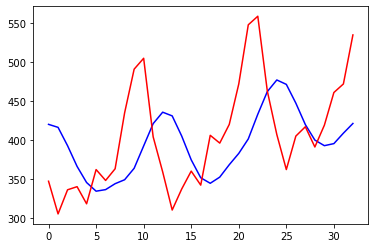

In [75]:
plt.plot(y_pred,color='blue')
plt.plot(Y_test,color='red')
plt.show()